In [ ]:
from fastai.vision.all import *

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 301.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 74.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
go

In [ ]:
import fastbook
from fastbook import *
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
ims=search_images_ddg("vanilla ice cream")
len(ims)

200

In [ ]:
icecream_types = ['vanilla','butterscotch','mint chocolate chip','pistha','strawberry']
path = Path('ice_cream')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in icecream_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{o} ice cream')
        download_images(dest, urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#935) [Path('ice_cream/butterscotch/3c6fa6cc-dee9-4870-b162-be904d2136ec.png'),Path('ice_cream/butterscotch/7cfa9fb5-87da-4a1d-87c6-f2a877aed53d.jpg'),Path('ice_cream/butterscotch/258cba2b-dc67-4126-82d8-d78e860497ad.JPG'),Path('ice_cream/butterscotch/11e949c7-5af0-4a60-ac7e-f8c2399612f0.png'),Path('ice_cream/butterscotch/f069912e-1784-422b-8e21-2fdf1f7c0833.jpg'),Path('ice_cream/butterscotch/5fdc2704-867e-4454-851b-61e8c10a8bc7.jpeg'),Path('ice_cream/butterscotch/30aa32a2-5b02-4d44-a7f5-0ddb0882639e.jpg'),Path('ice_cream/butterscotch/0fea6ba9-fcfb-4dc6-b070-25aad8588e6a.jpg'),Path('ice_cream/butterscotch/a151251c-552b-4b01-a444-4e8e6d43c788.jpg'),Path('ice_cream/butterscotch/77741c1c-cef0-40b7-9a64-07b6076027a6.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#12) [Path('ice_cream/butterscotch/d5a2332e-492d-4151-afc9-da3503a931d8.png'),Path('ice_cream/butterscotch/abfd2a70-e7a9-499a-8705-c786cdfc63ef.jpg'),Path('ice_cream/butterscotch/7ecf7015-1ed0-4ed4-8d66-eee9a010c087.jpg'),Path('ice_cream/pistha/b3552ff6-181f-43e9-9cc2-7c8123a7d228.jpg'),Path('ice_cream/pistha/5f5a51e7-a5f2-4754-875d-6d54df705add.jpg'),Path('ice_cream/pistha/24c0c23d-bfa8-40d2-9275-2b6641328d54.jpg'),Path('ice_cream/pistha/326bf08f-43b8-47c8-94a7-c90f865115e3.png'),Path('ice_cream/pistha/b67c9201-fa4b-4921-8af9-af6ebe2a8ce5.jpg'),Path('ice_cream/strawberry/b23df282-9ef3-4417-b3e3-b73d5b42b174.jpg'),Path('ice_cream/mint chocolate chip/7735d54d-ce08-4c23-bee7-fe2d8da45ac3.jpg')...]

In [ ]:
failed.map(Path.unlink);

In [ ]:

ice = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = ice.dataloaders(path)


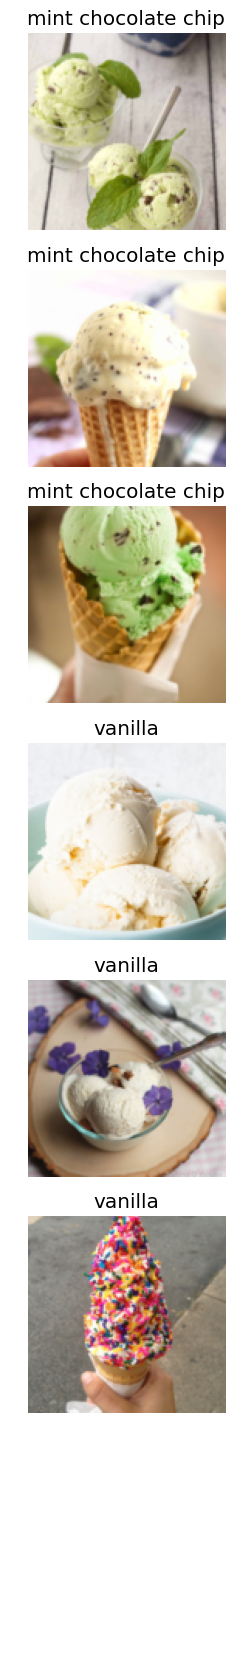

In [ ]:
dls.valid.show_batch(max_n=6, nrows=7)

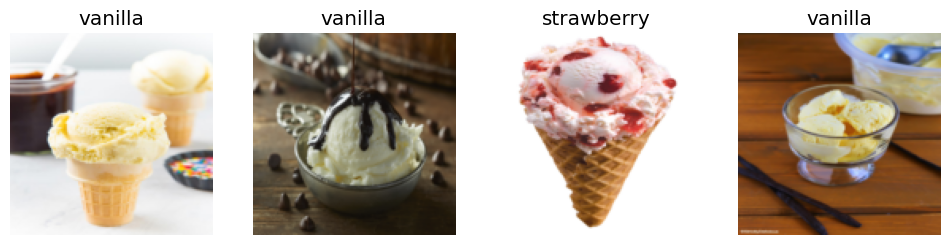

In [ ]:
ice =ice.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = ice.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

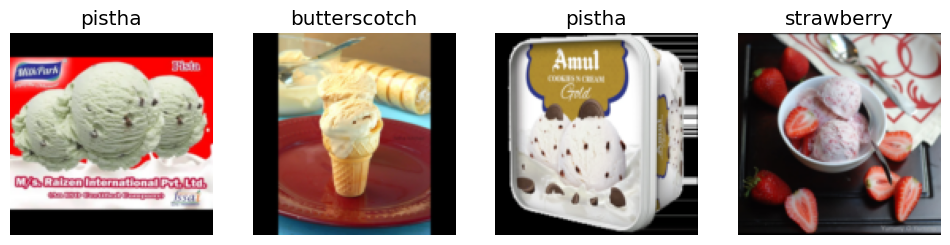

In [ ]:
ice= ice.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = ice.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

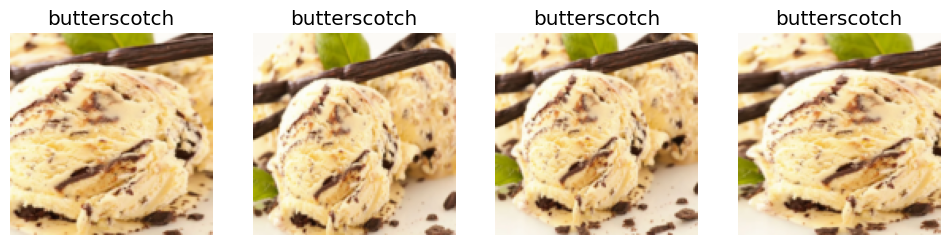

In [ ]:
ice = ice.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls =ice.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

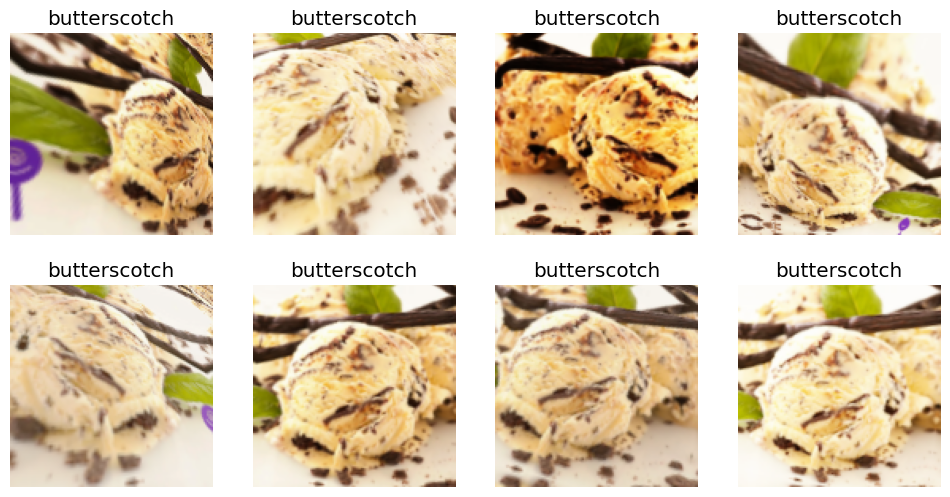

In [ ]:
ice = ice.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls =ice.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
ice = ice.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = ice.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 118MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.192459,0.942714,0.320652,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.992786,0.724767,0.206522,00:28
1,0.847269,0.602437,0.146739,00:28
2,0.710182,0.604126,0.146739,00:28
3,0.594091,0.612574,0.141304,00:27


In [ ]:
import requests
from fastai.vision.all import *

def predict_from_url(url, learn):
    response = requests.get(url)
    if response.status_code == 200:
        with open('temp_image.jpg', 'wb') as f:
            f.write(response.content)

        img = PILImage.create('temp_image.jpg')
        pred_class, pred_idx, outputs = learn.predict(img)
        print(f"Predicted class: {pred_class}")
        print(f"Prediction index: {pred_idx}")
        print(f"Class probabilities: {outputs}")
    else:
        print("Failed to retrieve the image. Please check the URL.")


url = 'https://th.bing.com/th/id/OIP.1rYn07ffArxaInv0uLAZEgHaLH?rs=1&pid=ImgDetMain'
predict_from_url(url, learn)


Predicted class: strawberry
Prediction index: 3
Class probabilities: tensor([1.4025e-05, 7.2537e-05, 3.3901e-04, 9.9956e-01, 9.3628e-06])
